# EX1

**Key difference between traditional ML and Deep Learning?**
Traditional ML needs manual feature extraction. Deep Learning learns features automatically using multilayer neural networks.

**How do neural networks imitate the human brain?**
Neural networks have nodes (neurons) connected like brain neurons. They process signals and learn by adjusting connections.

**Why is Deep Learning better with large datasets?**
Big data helps deep networks find complex patterns and improve model accuracy.

**Main problems of Deep Learning and how to fix them?**
Problems: overfitting, need for lots of data, heavy computing. Fixes: regularization, Dropout, data augmentation, strong hardware.

**What is feature engineering and why isn’t it needed in Deep Learning?**
Feature engineering is manually creating features from raw data. Deep Learning does this automatically through layers.

**Role of hidden layers?**
Hidden layers transform input to find complex patterns that help predictions.

**What does activation function do in an ANN?**
It adds non-linearity so the network can learn complex functions, not just simple sums.

# Exercise 2

Weighted Sum = (Temperature × 0.6) + (Rain × 0.4) + Bias
Bias = 2
**box 1:**
 Temp = 70, Rain = 0
Weighted Sum = 70*0.6 + 0*0.4 + 2 = 42 + 0 + 2 = 44

44 > 20 → Exit = 1 (go outside)

**box2:**
Temp = 50, Rain = 1
Weighted Sum = 50*0.6 + 1*0.4 + 2 = 30 + 0.4 + 2 = 32.4
32.4 > 20 → Exit = 1 (go outside)
**summ**
The perceptron suggests going outside in both cases because the weighted sum is above the threshold of 20. Even with rain and lower temperatures, the sum remains above the threshold due to the temperature weight and bias.


# Exercise **3**

In [2]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical

# 1. Загрузка данных MNIST
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# 2. Нормализация
x_train = x_train / 255.0
x_test = x_test / 255.0

# 3. One-hot кодирование меток
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# 4. Создание модели
model = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# 5. Компиляция
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# 6. Обучение
model.fit(x_train, y_train, epochs=5, validation_split=0.1)

# 7. Оценка
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_acc}")


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8732 - loss: 0.4564 - val_accuracy: 0.9663 - val_loss: 0.1259
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9613 - loss: 0.1328 - val_accuracy: 0.9722 - val_loss: 0.0992
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9747 - loss: 0.0866 - val_accuracy: 0.9757 - val_loss: 0.0839
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9824 - loss: 0.0600 - val_accuracy: 0.9763 - val_loss: 0.0841
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9855 - loss: 0.0464 - val_accuracy: 0.9797 - val_loss: 0.0793
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9697 - loss: 0.0976
Test accuracy: 0.9740999937057495


# Exercise 4

In [1]:
x1 = 2000  # площадь в кв. фут.
x2 = 3     # количество спален

w1 = 0.5   # вес для площади
w2 = 0.7   # вес для спален

b = 50000  # смещение (bias)

# 👉 Вычисляем линейную комбинацию
z = x1 * w1 + x2 * w2 + b

print(f'z = {z}')

# 👉 Функция активации ReLU
def relu(x):
    return max(0, x)

# 👉 Применяем ReLU
output = relu(z)

print(f'Предсказанная цена дома: ${output:.2f}')

z = 51002.1
Предсказанная цена дома: $51002.10


# Exercise 5

In [3]:
import numpy as np

# Данные
x = np.array([4, 80])  # 4 часа и оценка 80
w = np.array([0.6, 0.3])  # Начальные веса
b = 10  # Начальный bias

def forward_propagation(x, w, b):
    z = np.dot(x, w) + b
    return z

y_pred = forward_propagation(x, w, b)
y_true = 85

loss = 0.5 * (y_true - y_pred) ** 2

grad_w = -(y_true - y_pred) * x
grad_b = -(y_true - y_pred)

learning_rate = 0.01
w_new = w - learning_rate * grad_w
b_new = b - learning_rate * grad_b

print("Initial Prediction:", y_pred)
print("Loss:", loss)
print("Updated Weights:", w_new)
print("Updated Bias:", b_new)

Initial Prediction: 36.4
Loss: 1180.98
Updated Weights: [ 2.544 39.18 ]
Updated Bias: 10.486


In [6]:
import numpy as np

# Данные
x = np.array([4, 80])  # 4 часа и оценка 80
w = np.array([0.1, 10.0])  # Начальные веса
b = 10  # Начальный bias

def forward_propagation(x, w, b):
    z = np.dot(x, w) + b
    return z

y_pred = forward_propagation(x, w, b)
y_true = 85

loss = 0.5 * (y_true - y_pred) ** 2

grad_w = -(y_true - y_pred) * x
grad_b = -(y_true - y_pred)

learning_rate = 0.05
w_new = w - learning_rate * grad_w
b_new = b - learning_rate * grad_b

print("Initial Prediction:", y_pred)
print("Loss:", loss)
print("Updated Weights:", w_new)
print("Updated Bias:", b_new)

Initial Prediction: 810.4
Loss: 263102.57999999996
Updated Weights: [ -144.98 -2891.6 ]
Updated Bias: -26.270000000000003


# Exercise 6

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8707 - loss: 0.4578 - val_accuracy: 0.9648 - val_loss: 0.1244
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9605 - loss: 0.1317 - val_accuracy: 0.9735 - val_loss: 0.0932
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9748 - loss: 0.0816 - val_accuracy: 0.9727 - val_loss: 0.0904
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9810 - loss: 0.0627 - val_accuracy: 0.9773 - val_loss: 0.0799
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9869 - loss: 0.0441 - val_accuracy: 0.9765 - val_loss: 0.0814
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9741 - loss: 0.0903
Test accuracy: 0.9779999852180481
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


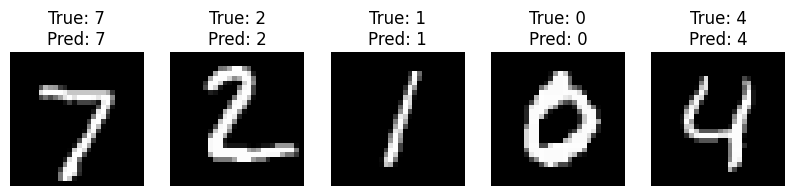

In [7]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np

# 1. Загрузка данных MNIST
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# 2. Нормализация
x_train = x_train / 255.0
x_test = x_test / 255.0

# 3. One-hot кодирование меток
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# 4. Создание модели
model = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# 5. Компиляция
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# 6. Обучение
model.fit(x_train, y_train, epochs=5, validation_split=0.1)

# 7. Оценка
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_acc}")


# Предсказания на тесте
predictions = model.predict(x_test)

# Функция для отображения изображений и предсказаний
def plot_images(images, labels, preds, n=5):
    plt.figure(figsize=(10, 4))
    for i in range(n):
        plt.subplot(1, n, i+1)
        plt.imshow(images[i], cmap='gray')
        plt.title(f"True: {np.argmax(labels[i])}\nPred: {np.argmax(preds[i])}")
        plt.axis('off')
    plt.show()

plot_images(x_test, y_test, predictions)
